In [1]:
%load_ext autoreload
%autoreload 2

import sys, pytz, time
sys.path.append("/app")

import pandas as pd

from classes.browser_interface import BrowserInterface

In [2]:
browser = BrowserInterface(
    option_args=[
        "--no-sandbox", 
        "--disable-dev-shm-usage", 
        "--remote-debugging-port=9222", 
        "--user-data-dir=/app/browser_data",
        "--ignore-certificate-errors",
        "--allow-insecure-localhost",
        "--no-gpu",
        "--window-size=1920x1080",
        "--headless"
    ],
    js_snippets=["/app/javascript/socketListener.js"],
)

browser.open("https://www.tradingview.com/chart")
# browser.open("https://google.com")

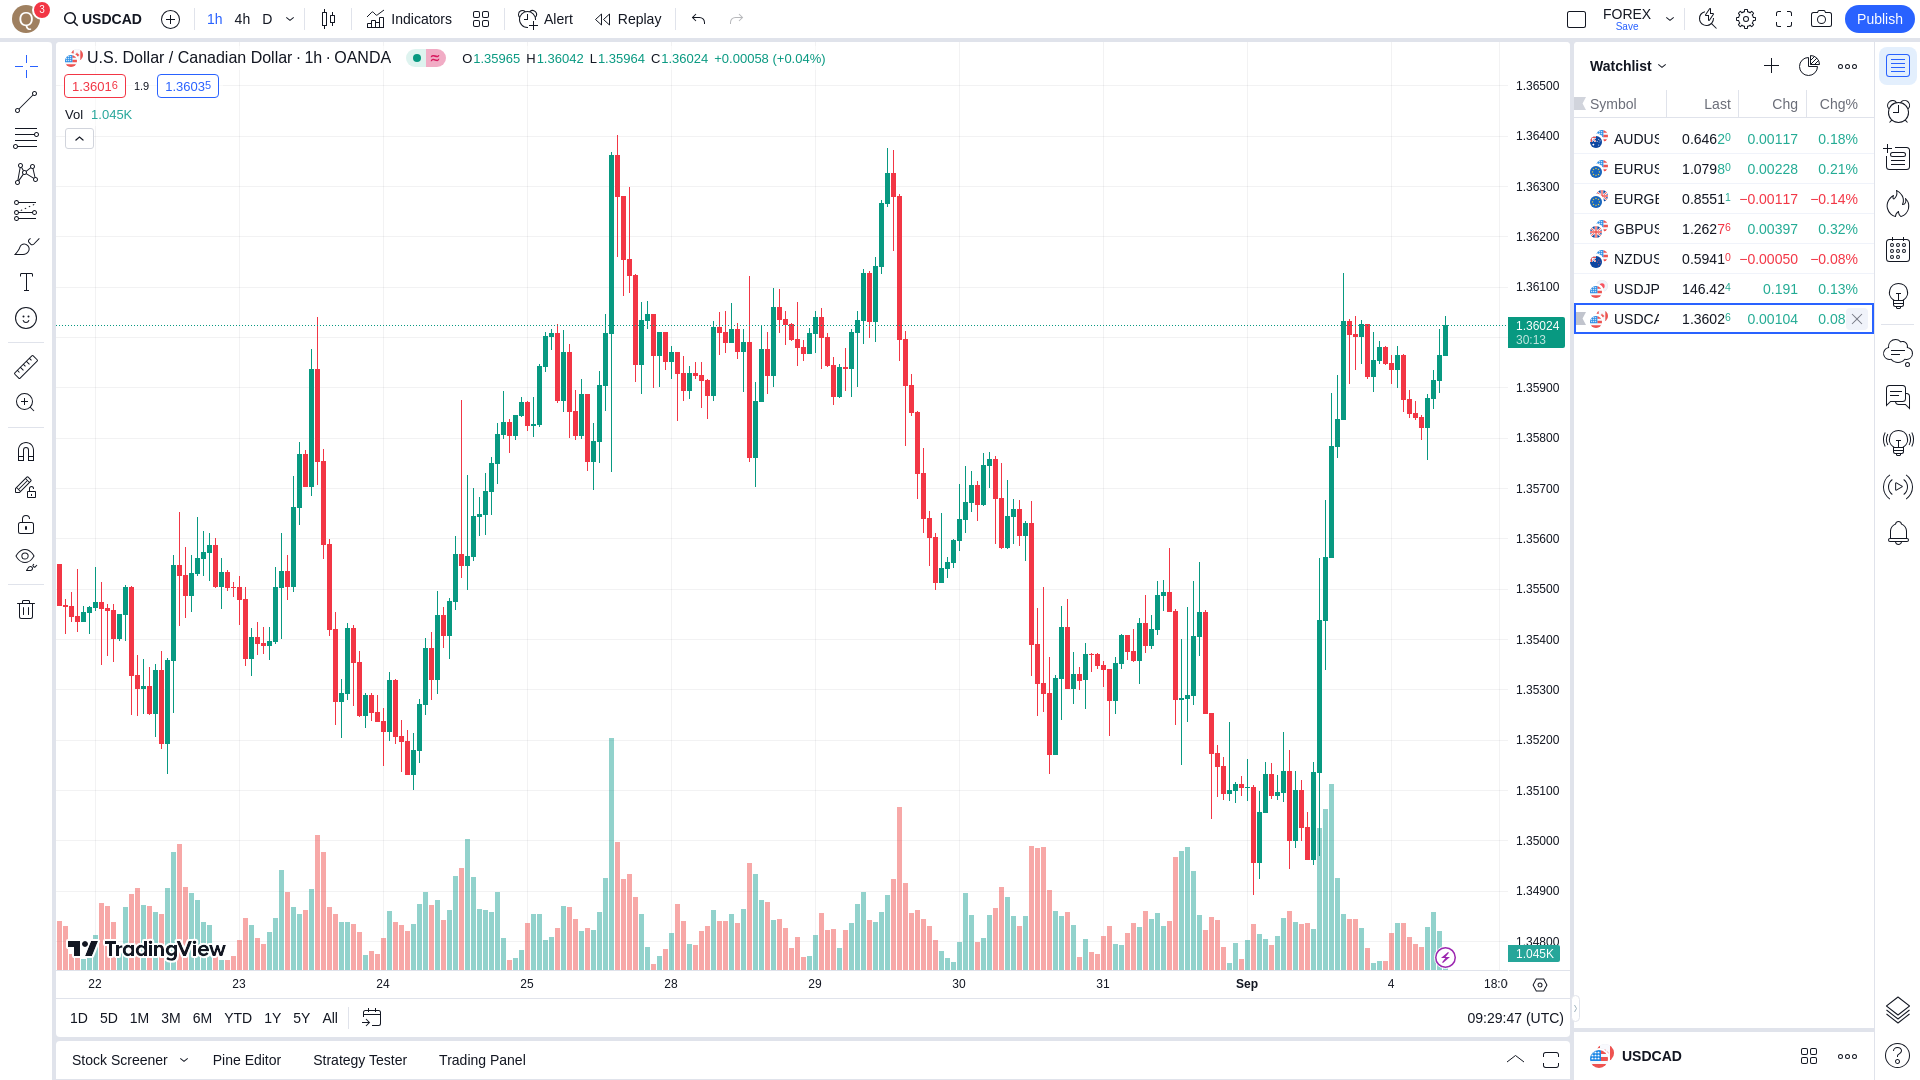

In [5]:
browser.screenshot(show=True)

In [12]:
browser.reload()

In [4]:
browser.iterate_watchlist()

In [6]:
watch_list = browser.get_watchlist()
browser.watchlist_selectors

{}

In [16]:
for symbol in watch_list.keys():
    browser.change_symbol(symbol)
    time.sleep(1)

In [11]:
SYMBOL = "USDCAD"
browser.change_symbol(SYMBOL)
# while True:
#     if browser._get_chart_data("symbol") == SYMBOL:
#         print(SYMBOL)
#         break
        

In [13]:
chart_data = browser._get_chart_data()
print(chart_data["symbol"])
df = pd.DataFrame(chart_data["chart"], columns=("time", "open", "high", "low", "close", "volume"))
df.time = pd.to_datetime(df.time, unit="s", utc=True).dt.tz_convert("America/New_York").dt.tz_localize(None)
df

AUDUSD


,time,open,high,low,close,volume
0,2023-08-10 18:00:00,0.65168,0.65192,0.651400,0.65170,735
1,2023-08-10 19:00:00,0.65170,0.65181,0.651180,0.65119,1014
2,2023-08-10 20:00:00,0.65119,0.65226,0.650980,0.65220,2091
3,2023-08-10 21:00:00,0.65220,0.65336,0.652200,0.65246,3049
4,2023-08-10 22:00:00,0.65246,0.65262,0.651590,0.65204,2752
...,...,...,...,...,...,...
295,2023-08-29 01:00:00,0.64437,0.64500,0.644120,0.64444,1669
296,2023-08-29 02:00:00,0.64444,0.64499,0.644230,0.64436,1738
297,2023-08-29 03:00:00,0.64436,0.64542,0.643595,0.64360,2490
298,2023-08-29 04:00:00,0.64360,0.64461,0.643480,0.64364,2196


In [16]:
!pip freeze | grep websockets

websockets==11.0.3
